# Disease prediction model
    Disease prediction model which uses Random Forest Classificator to prediction what is the most probable diesease that you might have with previously provided symptoms

### Importing the necessary libraries
- Pandas - Fast, powerful, flexible and easy to use open source data analysis and manipulation library
- Matplotlib -  comprehensive library for creating static, animated, and interactive visualizations
- Seaborn -  data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
- Sklearn - Simple and efficient tools for predictive data analysis
- NumPy - Library for scientific computing with Python

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
import warnings
warnings.simplefilter("ignore")

### Reading and displaying the first 25 elements from the main dataset

In [2]:
df = pd.read_csv('Data/dataset.csv')
df.head(25)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Dropping the unnecesarry columns  and shaping the data

In [3]:
df.drop(['Symptom_8','Symptom_9','Symptom_10','Symptom_11','Symptom_12','Symptom_13','Symptom_14','Symptom_15','Symptom_16','Symptom_17'],axis=1,inplace=True)
df.shape

(4920, 8)

### Calculating by percentage how many values are null

In [4]:
(df.isnull().sum() / df.shape[0]) * 100

Disease       0.000000
Symptom_1     0.000000
Symptom_2     0.000000
Symptom_3     0.000000
Symptom_4     7.073171
Symptom_5    24.512195
Symptom_6    40.365854
Symptom_7    53.902439
dtype: float64

### Displaying the data to check if the adjustments are correct

In [5]:
df.describe().T

,count,unique,top,freq
Disease,4920,41,Fungal infection,120
Symptom_1,4920,34,vomiting,822
Symptom_2,4920,48,vomiting,870
Symptom_3,4920,54,fatigue,726
Symptom_4,4572,50,high_fever,378
Symptom_5,3714,38,headache,348
Symptom_6,2934,32,nausea,390
Symptom_7,2268,26,abdominal_pain,264


### Further reshaping the data so it is more user readable

In [6]:
for col in df.columns:
    df[col] = df[col].str.replace('_', ' ')

cols = df.columns
data = df[cols].values.flatten()

reshaped = pd.Series(data)
reshaped = reshaped.str.strip()
reshaped = reshaped.values.reshape(df.shape)

df = pd.DataFrame(reshaped, columns = df.columns)
df.fillna(0, inplace=True)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7
0,Fungal infection,itching,skin rash,nodal skin eruptions,dischromic patches,0,0,0
1,Fungal infection,skin rash,nodal skin eruptions,dischromic patches,0,0,0,0
2,Fungal infection,itching,nodal skin eruptions,dischromic patches,0,0,0,0
3,Fungal infection,itching,skin rash,dischromic patches,0,0,0,0
4,Fungal infection,itching,skin rash,nodal skin eruptions,0,0,0,0


### Checking if there are any null values left

In [7]:
df.isna().sum()

Disease      0
Symptom_1    0
Symptom_2    0
Symptom_3    0
Symptom_4    0
Symptom_5    0
Symptom_6    0
Symptom_7    0
dtype: int64

### Checking for `Disease` column count

In [8]:
df['Disease'].value_counts()

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

### Loading the `Symptom Severity data` and apporpiately formatting it

In [9]:
df_symptom_severity = pd.read_csv('Data/Symptom-severity.csv')
df_symptom_severity.head()

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


In [10]:
df_symptom_severity['Symptom'] = df_symptom_severity['Symptom'].str.replace('_', ' ')
df_symptom_severity['Symptom'].unique()

array(['itching', 'skin rash', 'nodal skin eruptions',
       'continuous sneezing', 'shivering', 'chills', 'joint pain',
       'stomach pain', 'acidity', 'ulcers on tongue', 'muscle wasting',
       'vomiting', 'burning micturition', 'spotting urination', 'fatigue',
       'weight gain', 'anxiety', 'cold hands and feets', 'mood swings',
       'weight loss', 'restlessness', 'lethargy', 'patches in throat',
       'irregular sugar level', 'cough', 'high fever', 'sunken eyes',
       'breathlessness', 'sweating', 'dehydration', 'indigestion',
       'headache', 'yellowish skin', 'dark urine', 'nausea',
       'loss of appetite', 'pain behind the eyes', 'back pain',
       'constipation', 'abdominal pain', 'diarrhoea', 'mild fever',
       'yellow urine', 'yellowing of eyes', 'acute liver failure',
       'fluid overload', 'swelling of stomach', 'swelled lymph nodes',
       'malaise', 'blurred and distorted vision', 'phlegm',
       'throat irritation', 'redness of eyes', 'sinus pressu

In [11]:
theArray = np.array(df_symptom_severity['weight'])
theArray

array([1, 3, 4, 4, 5, 3, 3, 5, 3, 4, 3, 5, 6, 6, 4, 3, 4, 5, 3, 3, 5, 2,
       6, 5, 4, 7, 3, 4, 3, 4, 5, 3, 3, 4, 5, 4, 4, 3, 4, 4, 6, 5, 4, 4,
       6, 6, 7, 6, 6, 5, 5, 4, 5, 4, 5, 5, 7, 7, 5, 5, 6, 5, 6, 5, 4, 4,
       4, 4, 5, 5, 5, 6, 5, 5, 4, 5, 4, 4, 3, 2, 2, 4, 5, 5, 6, 4, 4, 4,
       3, 4, 5, 6, 5, 4, 5, 3, 2, 2, 2, 3, 4, 6, 6, 4, 5, 4, 5, 4, 4, 3,
       3, 5, 2, 7, 6, 4, 5, 4, 5, 6, 4, 2, 2, 2, 2, 3, 2, 2, 2, 4, 2, 3,
       5], dtype=int64)

### Merging the symptom severity data with the original data set

In [12]:
vals = df.values
symptoms = df_symptom_severity['Symptom'].unique()

for i in range(len(symptoms)):
    vals[vals == symptoms[i]] = df_symptom_severity[df_symptom_severity['Symptom'] == symptoms[i]]['weight'].values[0]
    
newDf = pd.DataFrame(vals, columns = cols)
newDf.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7
0,Fungal infection,1,3,4,dischromic patches,0,0,0
1,Fungal infection,3,4,dischromic patches,0,0,0,0
2,Fungal infection,1,4,dischromic patches,0,0,0,0
3,Fungal infection,1,3,dischromic patches,0,0,0,0
4,Fungal infection,1,3,4,0,0,0,0


### Modifying the data so we have correct symptoms severity distribution

In [13]:
newDf = newDf.replace('dischromic  patches', 0) # Leave two spaces. Don't know why
newDf = newDf.replace('spotting  urination', 0) # Here as well
newDf = newDf.replace('foul smell of urine', 0)

newDf.head(10)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7
0,Fungal infection,1,3,4,0,0,0,0
1,Fungal infection,3,4,0,0,0,0,0
2,Fungal infection,1,4,0,0,0,0,0
3,Fungal infection,1,3,0,0,0,0,0
4,Fungal infection,1,3,4,0,0,0,0
5,Fungal infection,3,4,0,0,0,0,0
6,Fungal infection,1,4,0,0,0,0,0
7,Fungal infection,1,3,0,0,0,0,0
8,Fungal infection,1,3,4,0,0,0,0
9,Fungal infection,1,3,4,0,0,0,0


In [14]:
X = newDf.drop(['Disease'], axis = 1)
y = newDf['Disease']

In [15]:
X.head()

,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7
0,1,3,4,0,0,0,0
1,3,4,0,0,0,0,0
2,1,4,0,0,0,0,0
3,1,3,0,0,0,0,0
4,1,3,4,0,0,0,0


In [16]:
y.sample(6)

954     Paralysis (brain hemorrhage)
3502                          Dengue
2460                Fungal infection
2185    Paralysis (brain hemorrhage)
1358            Cervical spondylosis
1174                       Arthritis
Name: Disease, dtype: object

## Actual Model 
##### Importing libraries that are used to develop and train the appropriate model

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

### Defining parameters for the model training

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 0)

### Training the model with the given parameters

In [19]:
clf_rfc = RandomForestClassifier(n_estimators=700, random_state=0, n_jobs=-1, verbose=4)
clf_rfc.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 700building tree 2 of 700

building tree 3 of 700
building tree 4 of 700
building tree 5 of 700
building tree 6 of 700
building tree 7 of 700
building tree 8 of 700
building tree 9 of 700
building tree 10 of 700
building tree 11 of 700
building tree 12 of 700
building tree 13 of 700
building tree 14 of 700
building tree 15 of 700
building tree 16 of 700
building tree 17 of 700
building tree 18 of 700
building tree 19 of 700
building tree 20 of 700
building tree 21 of 700
building tree 22 of 700
building tree 23 of 700
building tree 24 of 700
building tree 25 of 700
building tree 26 of 700
building tree 27 of 700
building tree 28 of 700
building tree 29 of 700
building tree 30 of 700
building tree 31 of 700
building tree 32 of 700
building tree 33 of 700
building tree 34 of 700
building tree 35 of 700
building tree 36 of 700
building tree 37 of 700
building tree 38 of 700
building tree 39 of 700
building tree 40 of 700
building tree 41 of 700
building tree 42 of 700
b

[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.3s


building tree 136 of 700
building tree 137 of 700
building tree 138 of 700
building tree 139 of 700
building tree 140 of 700
building tree 141 of 700
building tree 142 of 700
building tree 143 of 700
building tree 144 of 700
building tree 145 of 700
building tree 146 of 700
building tree 147 of 700
building tree 148 of 700
building tree 149 of 700
building tree 150 of 700
building tree 151 of 700
building tree 152 of 700
building tree 153 of 700
building tree 154 of 700
building tree 155 of 700
building tree 156 of 700
building tree 157 of 700
building tree 158 of 700
building tree 159 of 700
building tree 160 of 700
building tree 161 of 700
building tree 162 of 700
building tree 163 of 700
building tree 164 of 700
building tree 165 of 700
building tree 166 of 700
building tree 167 of 700
building tree 168 of 700
building tree 169 of 700
building tree 170 of 700
building tree 171 of 700
building tree 172 of 700
building tree 173 of 700
building tree 174 of 700
building tree 175 of 700


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    0.9s


building tree 226 of 700
building tree 227 of 700
building tree 228 of 700
building tree 229 of 700
building tree 230 of 700
building tree 231 of 700
building tree 232 of 700
building tree 233 of 700
building tree 234 of 700
building tree 235 of 700
building tree 236 of 700
building tree 237 of 700
building tree 238 of 700
building tree 239 of 700
building tree 240 of 700
building tree 241 of 700
building tree 242 of 700
building tree 243 of 700
building tree 244 of 700
building tree 245 of 700
building tree 246 of 700
building tree 247 of 700
building tree 248 of 700
building tree 249 of 700
building tree 250 of 700
building tree 251 of 700
building tree 252 of 700
building tree 253 of 700
building tree 254 of 700
building tree 255 of 700
building tree 256 of 700
building tree 257 of 700
building tree 258 of 700
building tree 259 of 700
building tree 260 of 700
building tree 261 of 700
building tree 262 of 700
building tree 263 of 700
building tree 264 of 700
building tree 265 of 700


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    1.7s


building tree 413 of 700
building tree 414 of 700
building tree 415 of 700
building tree 416 of 700
building tree 417 of 700
building tree 418 of 700
building tree 419 of 700
building tree 420 of 700
building tree 421 of 700
building tree 422 of 700
building tree 423 of 700
building tree 424 of 700
building tree 425 of 700
building tree 426 of 700
building tree 427 of 700
building tree 428 of 700
building tree 429 of 700
building tree 430 of 700
building tree 431 of 700
building tree 432 of 700
building tree 433 of 700
building tree 434 of 700
building tree 435 of 700
building tree 436 of 700
building tree 437 of 700
building tree 438 of 700
building tree 439 of 700
building tree 440 of 700
building tree 441 of 700
building tree 442 of 700
building tree 443 of 700
building tree 444 of 700
building tree 445 of 700
building tree 446 of 700
building tree 447 of 700
building tree 448 of 700
building tree 449 of 700
building tree 450 of 700
building tree 451 of 700
building tree 452 of 700


[Parallel(n_jobs=-1)]: Done 605 tasks      | elapsed:    2.7s


building tree 639 of 700
building tree 640 of 700
building tree 641 of 700
building tree 642 of 700
building tree 643 of 700
building tree 644 of 700
building tree 645 of 700
building tree 646 of 700
building tree 647 of 700
building tree 648 of 700
building tree 649 of 700
building tree 650 of 700
building tree 651 of 700
building tree 652 of 700
building tree 653 of 700
building tree 654 of 700
building tree 655 of 700
building tree 656 of 700
building tree 657 of 700
building tree 658 of 700
building tree 659 of 700
building tree 660 of 700
building tree 661 of 700
building tree 662 of 700
building tree 663 of 700
building tree 664 of 700
building tree 665 of 700
building tree 666 of 700
building tree 667 of 700
building tree 668 of 700
building tree 669 of 700
building tree 670 of 700
building tree 671 of 700
building tree 672 of 700
building tree 673 of 700
building tree 674 of 700
building tree 675 of 700
building tree 676 of 700
building tree 677 of 700
building tree 678 of 700


[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed:    3.1s finished


RandomForestClassifier(n_estimators=700, n_jobs=-1, random_state=0, verbose=4)

### Visualizing the model performance

In [20]:
predict = clf_rfc.predict(X_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 213 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 384 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 605 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 700 out of 700 | elapsed:    0.4s finished


In [21]:
print('Accuracy Score: {}%'.format(round(accuracy_score(y_test, predict) * 100,2)))

Accuracy Score: 98.48%


In [22]:
print(classification_report(y_test, predict))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        24
                                   AIDS       1.00      1.00      1.00        24
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        24
                                Allergy       0.86      1.00      0.92        24
                              Arthritis       1.00      1.00      1.00        24
                       Bronchial Asthma       1.00      1.00      1.00        24
                   Cervical spondylosis       1.00      1.00      1.00        24
                            Chicken pox       1.00      1.00      1.00        24
                    Chronic cholestasis       1.00      1.00      1.00        24
                            Common Cold       1.00      1.00      1.00        24
                           

<AxesSubplot:>

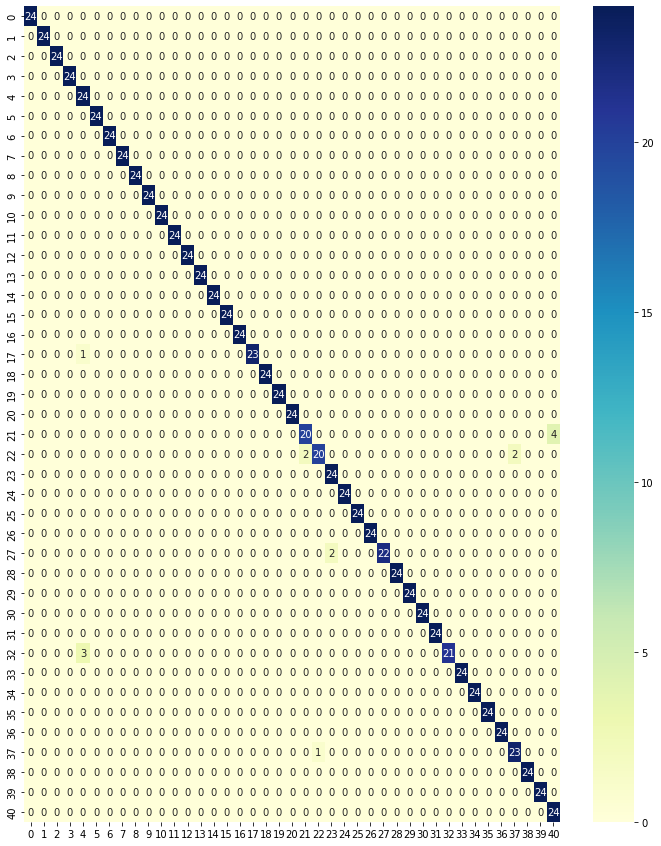

In [23]:
plt.figure(figsize=(12,15))
sns.heatmap(confusion_matrix(y_test, predict), annot=True, cbar=True, cmap='YlGnBu')

### Predict function to predict a disease with provided symptoms sorted by their severity

In [24]:
def predict(s1, s2, s3, s4='vomiting', s5='vomiting', s6='vomiting', s7='vomiting'):
    l = [s1, s2, s3, s4, s5, s6, s7]
    print(l)
    
    x = np.array(df_symptom_severity['Symptom'])
    y = np.array(df_symptom_severity['weight'])
    
    for i in range(len(l)):
        for j in range(len(x)):
            if (l[i] == x[j]):
                l[i] = y[j]
    
    res = [l]
    return res

In [25]:
predict('itching', 'skin rash', 'nodal skin eruptions')

['itching', 'skin rash', 'nodal skin eruptions', 'vomiting', 'vomiting', 'vomiting', 'vomiting']


[[1, 3, 4, 5, 5, 5, 5]]

### Dumping / Saving the model

In [26]:
import pickle
pickle.dump(clf_rfc, open('randomForestClassificator.pkl', 'wb'))